In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
data = pd.read_csv("C:\\Users\\PALLAB\\Downloads\\mydailydata\\IMDb Movies India.csv", encoding='ISO-8859-1')

data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
data.dropna(subset=['Rating'], inplace=True)

In [6]:
data.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [7]:
data.dropna(subset=['Duration'], inplace=True)

In [8]:
data.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [9]:
data.dropna(subset=['Actor 3'], inplace=True)


In [10]:
data.isna().sum()

Name         0
Year         0
Duration     0
Genre       29
Rating       0
Votes        0
Director     0
Actor 1      0
Actor 2      0
Actor 3      0
dtype: int64

In [11]:
data.dropna(subset=['Genre'], inplace=True)

In [12]:
data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [13]:
data.shape

(5659, 10)

In [14]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [15]:
data.nunique()

Name        5385
Year          91
Duration     174
Genre        376
Rating        83
Votes       2027
Director    2431
Actor 1     1960
Actor 2     2321
Actor 3     2556
dtype: int64

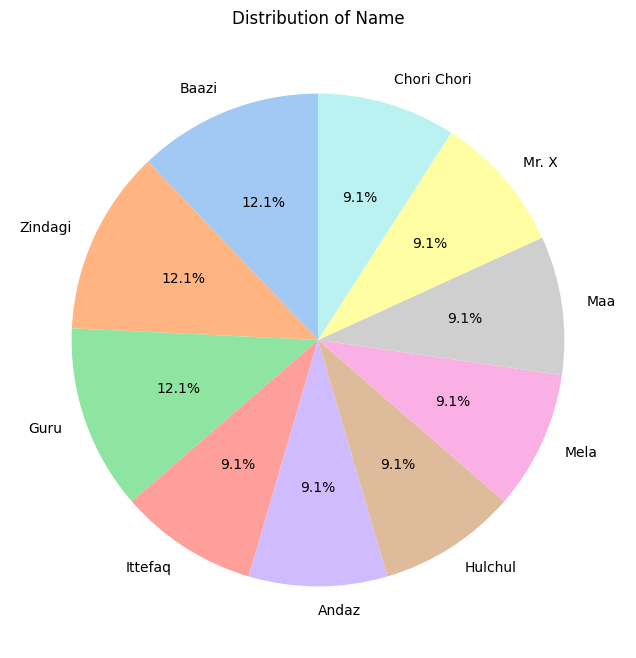

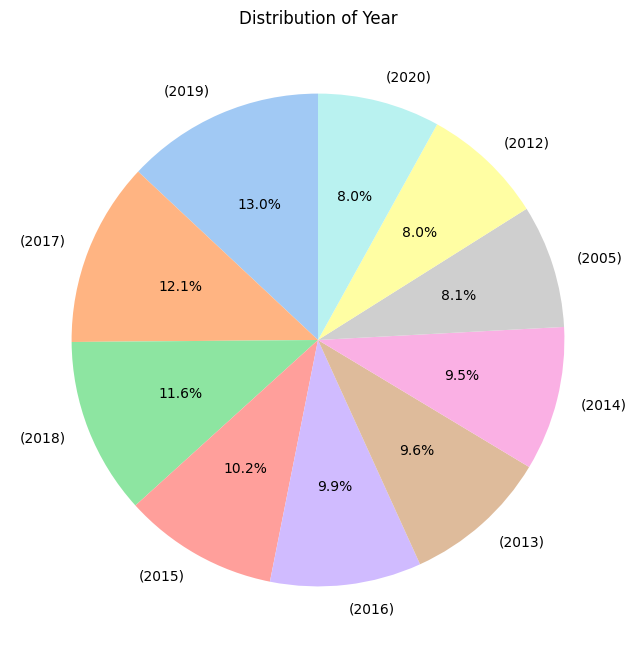

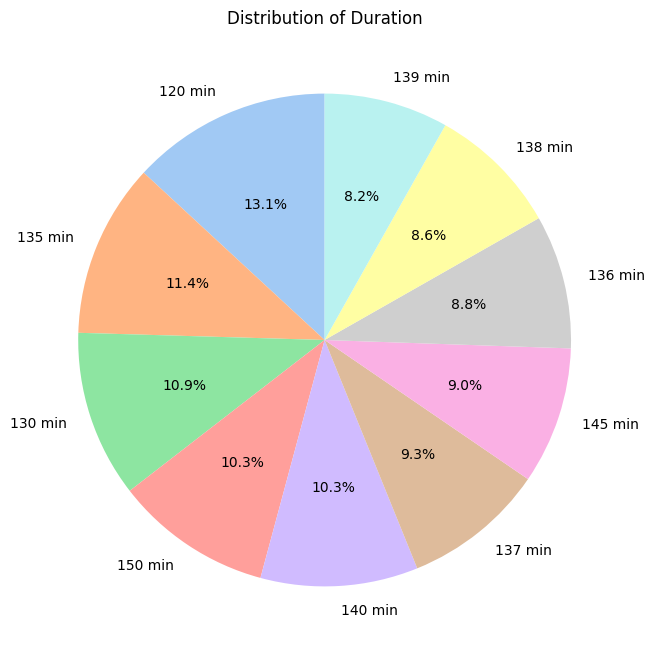

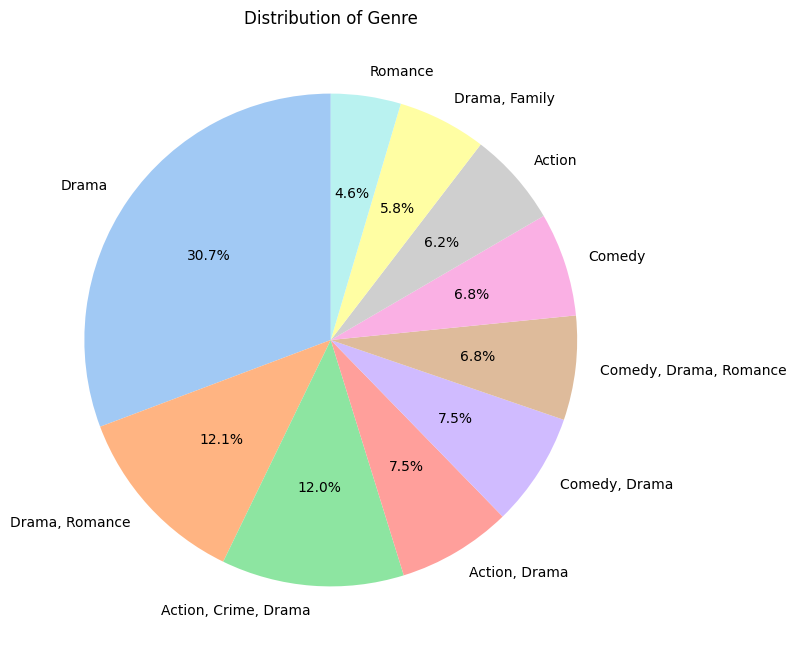

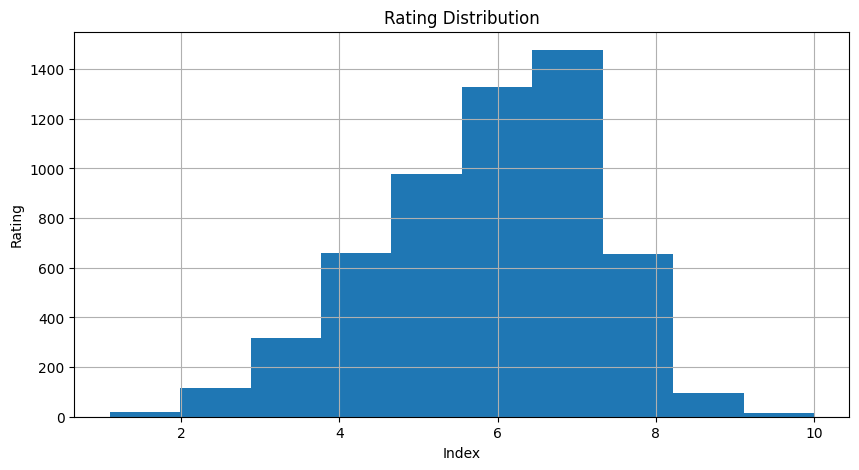

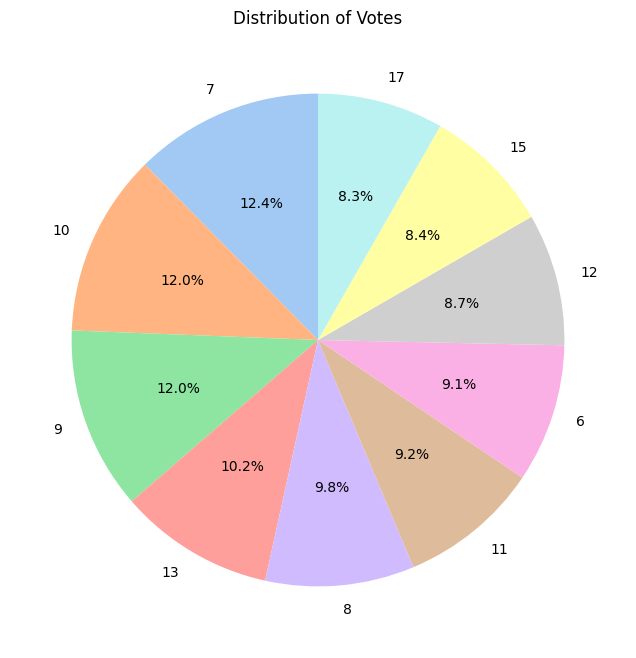

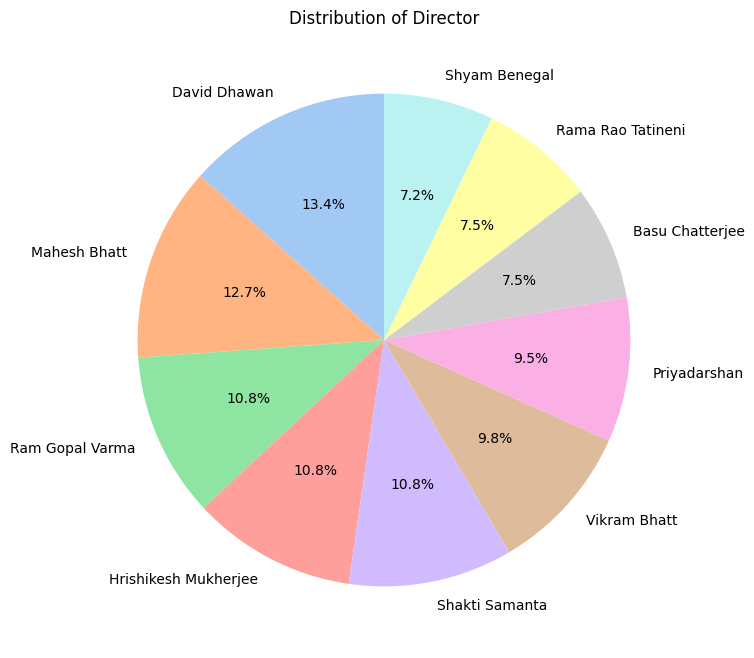

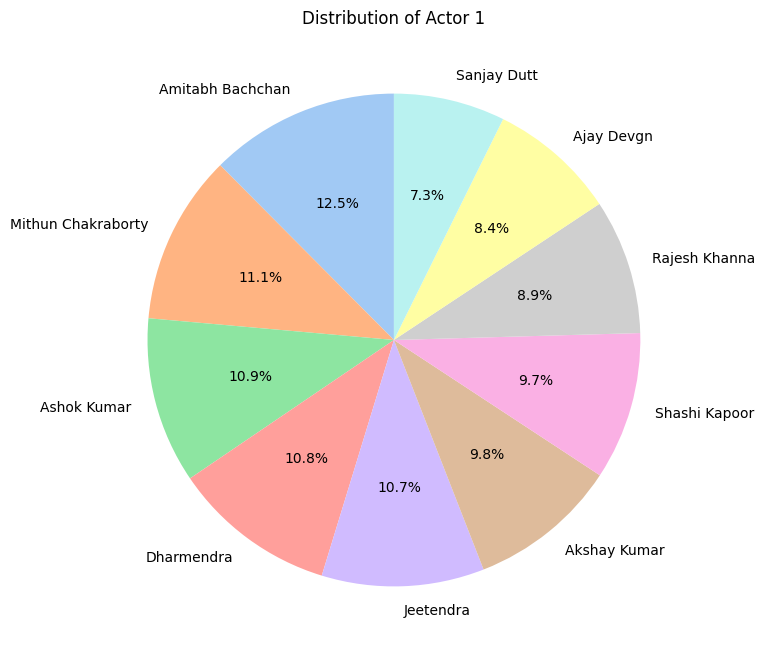

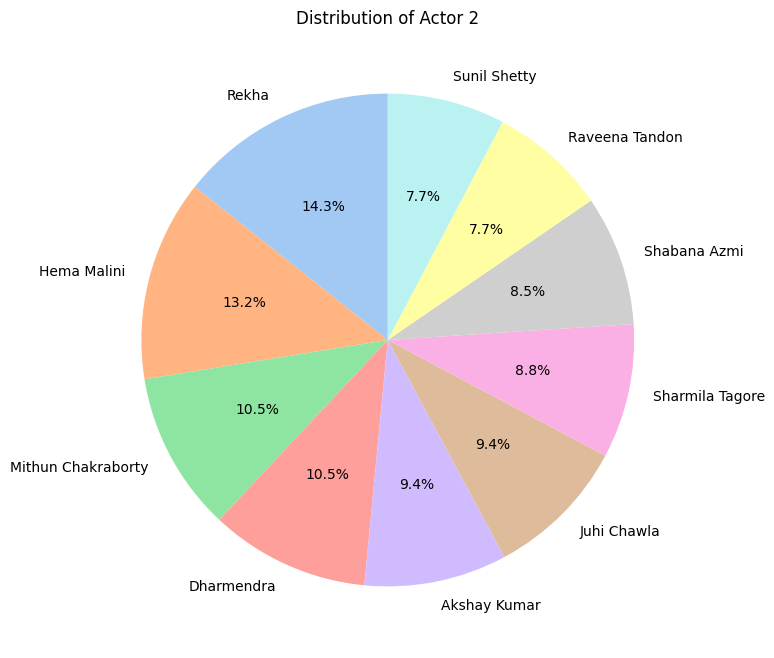

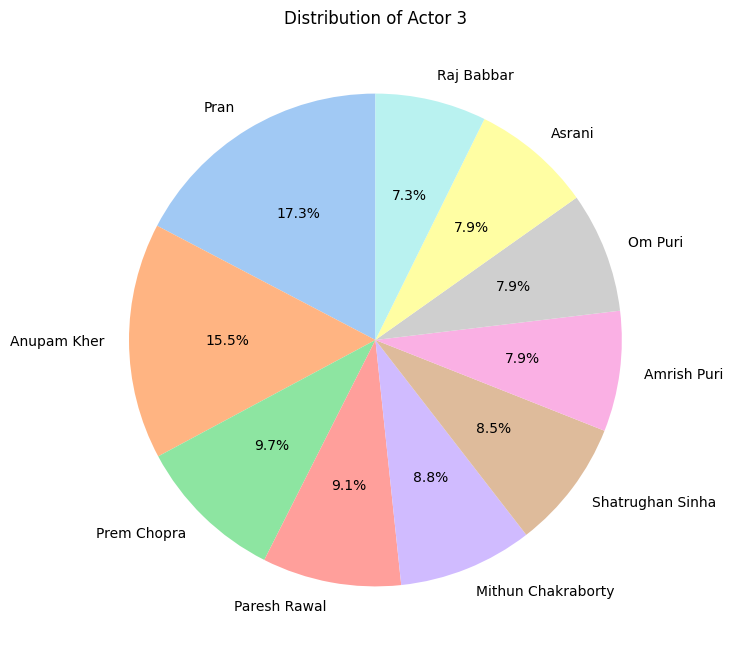

In [16]:
def plot_pie_chart(column):
    plt.figure(figsize=(8, 8))
    data[column].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()
    
    
def plot_hist_chart(column):
    plt.figure(figsize=(10, 5))
    data[column].hist()
    plt.title(f'{column} Distribution')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

# Plotting for each column
for col in data.columns:
    if data[col].dtype == 'object':
        plot_pie_chart(col)
    else:
        plot_hist_chart(col)

In [17]:
data['Year'] = data['Year'].str.replace('(', '')
data['Year'] = data['Year'].str.replace(')', '').astype(int)

data['Duration'] = data['Duration'].str.split(' ', expand=True)[0].astype(float)

data['Votes'] = data['Votes'].str.replace(',', '').astype(int)

data


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115.0,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153.0,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [18]:
data.drop(columns=["Name"], inplace=True)
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [19]:
# Initialize a dictionary to store the sum and count for each category
avg_ratings = {'Director': {}, 'Actor 1': {}, 'Actor 2': {}, 'Actor 3': {}}

# Iterate over the data to calculate sum and count for each category
for index, row in data.iterrows():
    for category in avg_ratings.keys():
        name = row[category]
        rating = row['Rating']
        if name in avg_ratings[category]:
            avg_ratings[category][name]['sum'] += rating
            avg_ratings[category][name]['count'] += 1
        else:
            avg_ratings[category][name] = {'sum': rating, 'count': 1}

# Apply the average calculation for each category
for category in avg_ratings.keys():
    data[f'{category} Average Rating'] = data[category].apply(lambda x: avg_ratings[category][x]['sum'] / avg_ratings[category][x]['count'])

# Drop the unnecessary columns
data.drop(columns=["Actor 1", "Actor 2", "Actor 3", "Director"], inplace=True)


In [20]:
data.head()

,Year,Duration,Genre,Rating,Votes,Director Average Rating,Actor 1 Average Rating,Actor 2 Average Rating,Actor 3 Average Rating
1,2019,109.0,Drama,7.0,8,7.000000,6.850000,7.000000,7.000000
3,2019,110.0,"Comedy, Romance",4.4,35,4.400000,5.420000,4.400000,4.450000
5,1997,147.0,"Comedy, Drama, Musical",4.7,827,5.313333,4.788889,5.786667,5.872727
6,2005,142.0,"Drama, Romance, War",7.4,1086,7.383333,5.435000,6.933333,6.500000
8,2012,82.0,"Horror, Mystery, Thriller",5.6,326,5.600000,5.600000,5.883333,5.600000


In [21]:
data['Genre1'] = data.Genre.str.split(',',expand=True)[0]
data['Genre2'] = data.Genre.str.split(',',expand=True)[1]
data['Genre3'] = data.Genre.str.split(',',expand=True)[2]
for i in data.index:
    if data.at[i, 'Genre2'] == 0:
        data.at[i, 'Genre2'] = data.at[i, 'Genre1']
    elif data.at[i, 'Genre3'] == 0:
        data.at[i, 'Genre3'] = data.at[i, 'Genre2']
for col in ['Genre1', 'Genre2', 'Genre3']:
    data[col], _ = pd.factorize(data[col])
data.drop(columns=["Genre"], inplace=True)
data.head()

,Year,Duration,Rating,Votes,Director Average Rating,Actor 1 Average Rating,Actor 2 Average Rating,Actor 3 Average Rating,Genre1,Genre2,Genre3
1,2019,109.0,7.0,8,7.000000,6.850000,7.000000,7.000000,0,-1,-1
3,2019,110.0,4.4,35,4.400000,5.420000,4.400000,4.450000,1,0,-1
5,1997,147.0,4.7,827,5.313333,4.788889,5.786667,5.872727,1,1,0
6,2005,142.0,7.4,1086,7.383333,5.435000,6.933333,6.500000,0,0,1
8,2012,82.0,5.6,326,5.600000,5.600000,5.883333,5.600000,2,2,2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     5659 non-null   int32  
 1   Duration                 5659 non-null   float64
 2   Rating                   5659 non-null   float64
 3   Votes                    5659 non-null   int32  
 4   Director Average Rating  5659 non-null   float64
 5   Actor 1 Average Rating   5659 non-null   float64
 6   Actor 2 Average Rating   5659 non-null   float64
 7   Actor 3 Average Rating   5659 non-null   float64
 8   Genre1                   5659 non-null   int64  
 9   Genre2                   5659 non-null   int64  
 10  Genre3                   5659 non-null   int64  
dtypes: float64(6), int32(2), int64(3)
memory usage: 615.4 KB


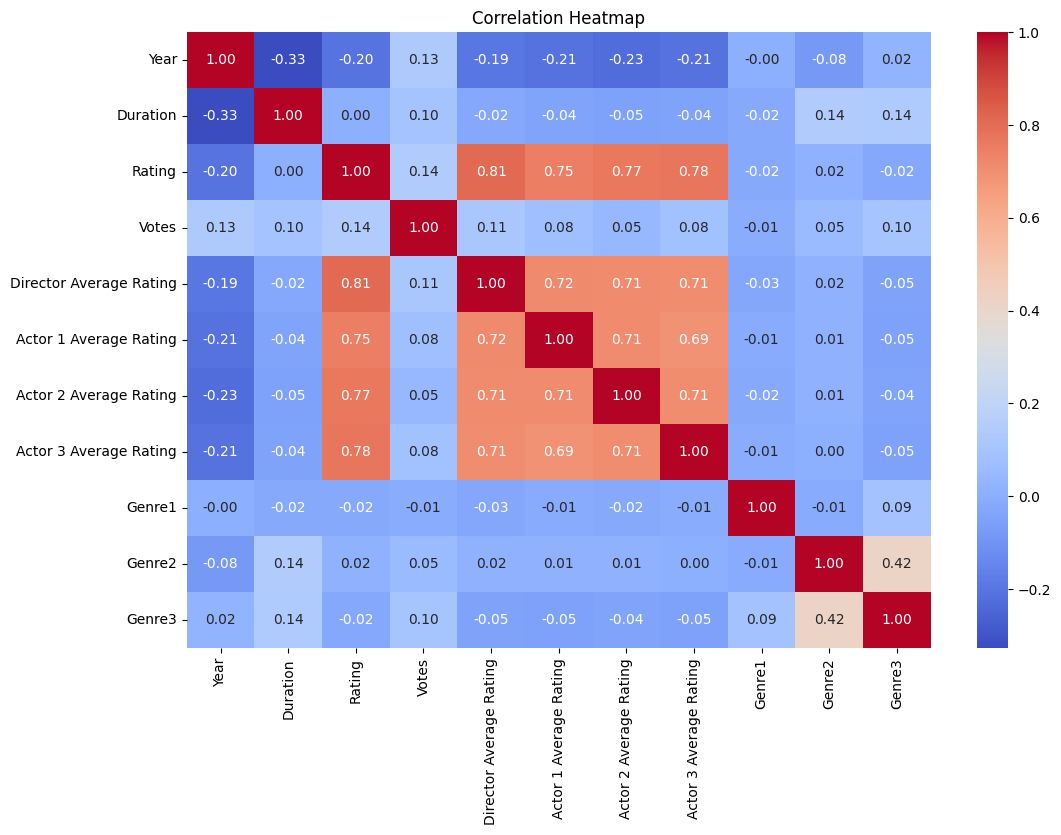

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df = data[["Votes","Actor 1 Average Rating","Actor 2 Average Rating","Actor 3 Average Rating","Director Average Rating","Rating","Genre1","Genre2","Genre3","Year"]]


In [25]:
# Assuming 'data' is a pandas DataFrame with features and target
X = df.drop(columns='Rating')  # Features
y = df['Rating']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, R2: {r2_linear}")


Linear Regression - MSE: 0.4345852585016786, R2: 0.7653102472312239


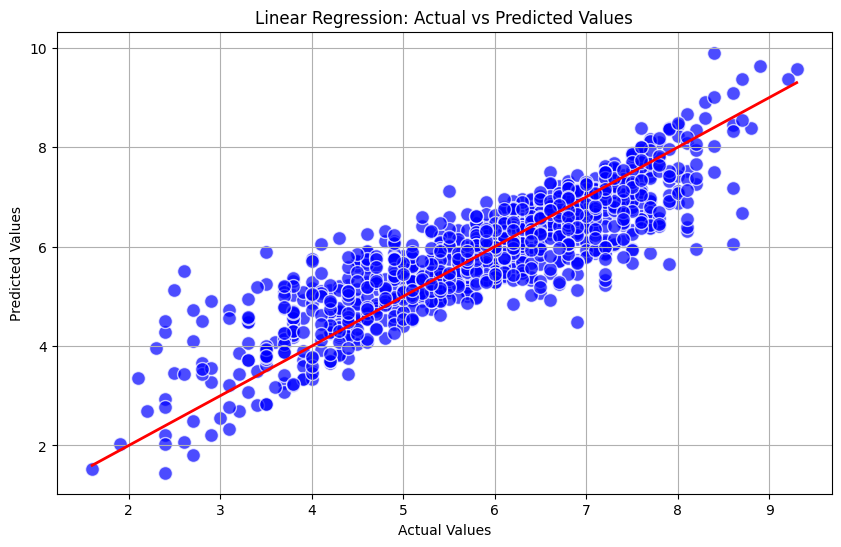

In [27]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', edgecolor='w', s=100, alpha=0.7)

# Plot a line representing the perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.grid(True)
plt.show()


Polynomial Regression (degree=2) - MSE: 0.42266250960868906, R2: 0.7717489078513909


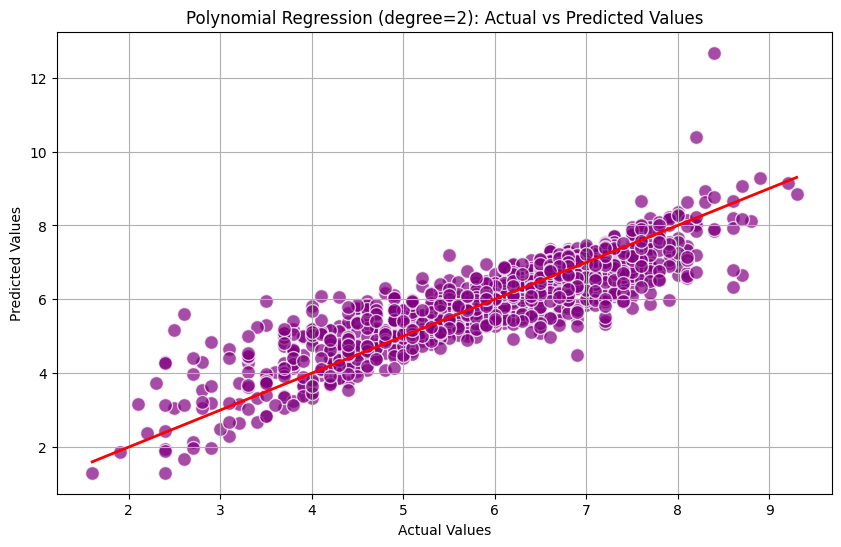

In [28]:


# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
# Initialize and train the model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Make predictions
y_pred_poly = poly_model.predict(poly.fit_transform(X_test))
# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree=2) - MSE: {mse_poly}, R2: {r2_poly}")
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='purple', edgecolor='w', s=100, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Polynomial Regression (degree=2): Actual vs Predicted Values')
plt.grid(True)
plt.show()


In [29]:
# Initialize the model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression - MSE: {mse_tree}, R2: {r2_tree}")


Decision Tree Regression - MSE: 0.7020848056537102, R2: 0.6208520509193778


In [30]:
# Initialize the model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = random_forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest Regression - MSE: {mse_forest}, R2: {r2_forest}")


Random Forest Regression - MSE: 0.3457584257950529, R2: 0.8132795397908124


In [34]:
y_train_forest = random_forest_model.predict(X_train)
mse_train_forest = mean_squared_error(y_train, y_train_forest)
r2_train_forest = r2_score(y_train, y_train_forest)

print(f"Random Forest Regression - MSE: {mse_train_forest}, R2: {r2_train_forest}")

Random Forest Regression - MSE: 0.04821939938148877, R2: 0.9748989381164258


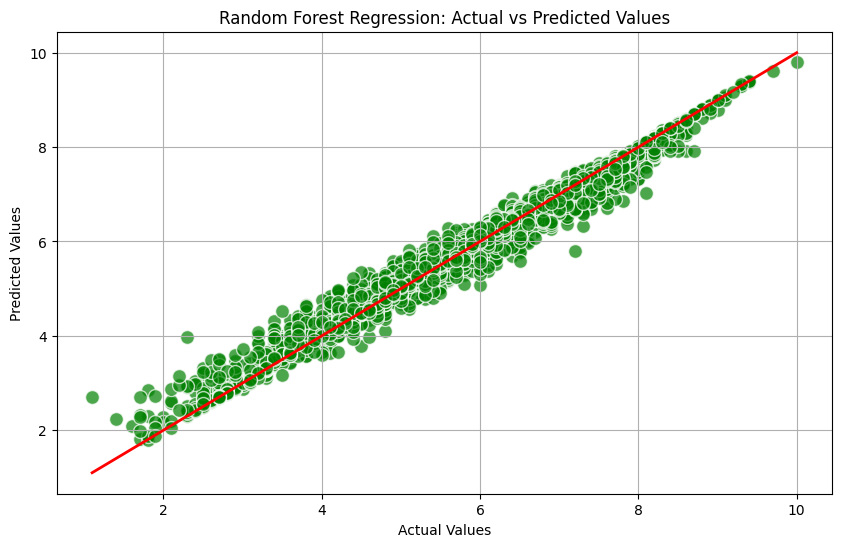

In [35]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_forest, color='green', edgecolor='w', s=100, alpha=0.7)

# Plot a line representing the perfect prediction
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linewidth=2)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted Values')
plt.grid(True)
plt.show()


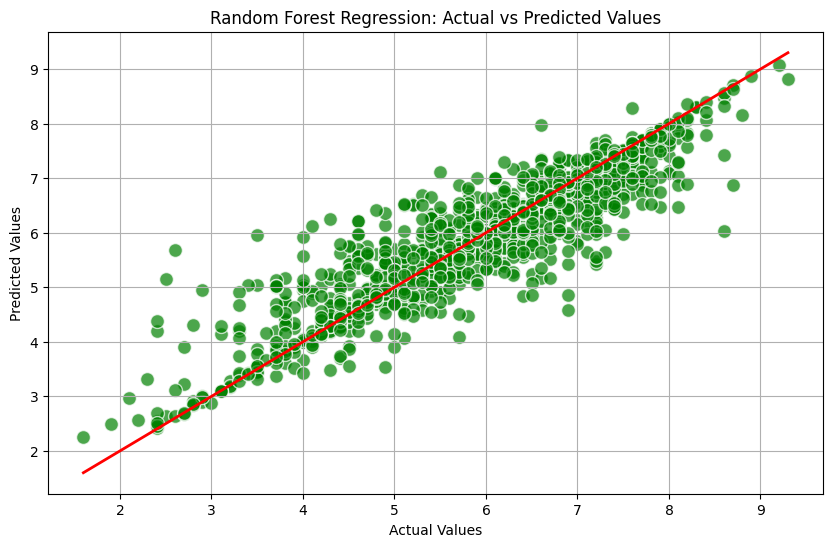

In [31]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, color='green', edgecolor='w', s=100, alpha=0.7)

# Plot a line representing the perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted Values')
plt.grid(True)
plt.show()
